In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv("Mall_Customers.csv")
dataset.head()
dataset.drop("CustomerID",axis=1,inplace=True)
dataset.head()
dataset.shape

(200, 4)

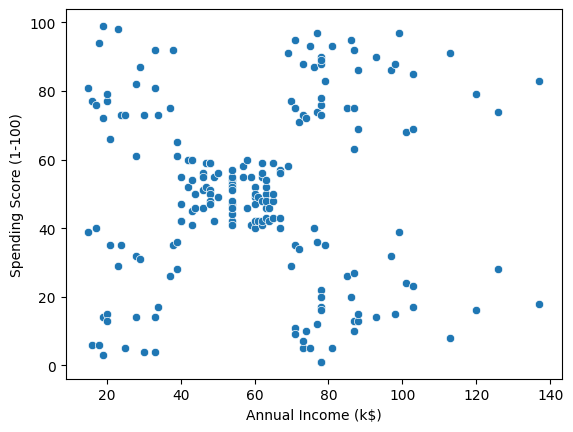

In [3]:
sns.scatterplot(data=dataset,x="Annual Income (k$)",y="Spending Score (1-100)")
plt.show()

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x=dataset.iloc[:,[2,3]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
ss=StandardScaler()
ss.fit(x)
x_scaled=ss.transform(x)
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [6]:
km=KMeans(n_clusters=5,random_state=42)
labels=km.fit_predict(x_scaled)

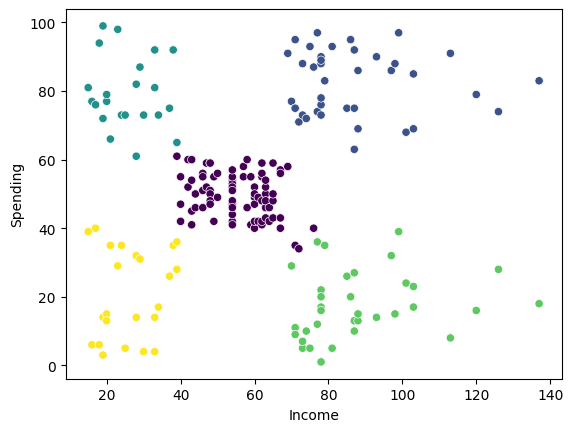

In [7]:
sns.scatterplot(data=dataset,x="Annual Income (k$)",y="Spending Score (1-100)",c=labels)
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

In [8]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x_scaled,labels)
print(score)

0.5546571631111091


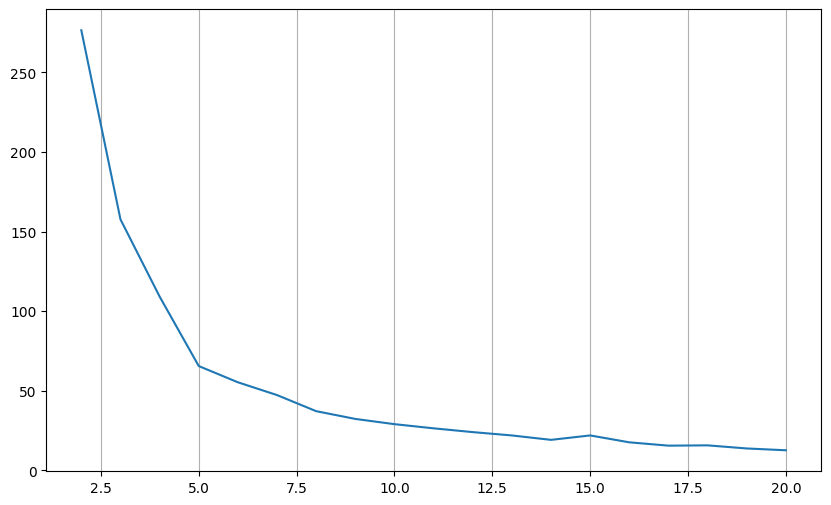

In [16]:
wcss=[]
for i in range(2,21):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(x_scaled)
    km.inertia_
    wcss.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot([i for i in range(2,21)],wcss)
plt.grid(axis='x')
plt.show()

In [10]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.3,min_samples=5)
labels_db=db.fit_predict(x_scaled)

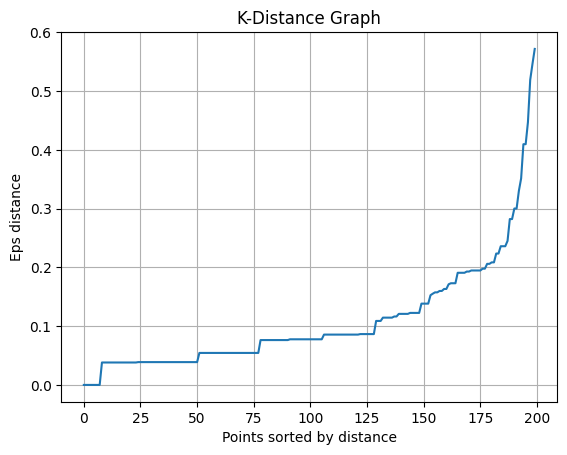

In [18]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nn=NearestNeighbors(n_neighbors=2)
nbrs=nn.fit(x_scaled)
dist,indices=nbrs.kneighbors(x_scaled)
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist)
plt.title("K-Distance Graph")
plt.ylabel("Eps distance")
plt.xlabel("Points sorted by distance")
plt.grid()
plt.show()

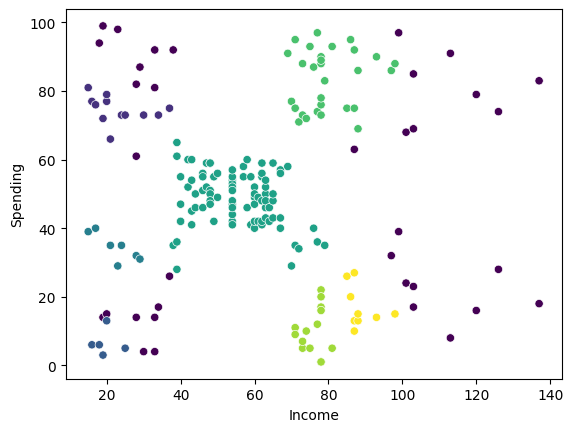

In [11]:
sns.scatterplot(data=dataset,x="Annual Income (k$)",y="Spending Score (1-100)",c=labels_db)
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

In [12]:
print(len(set(labels_db)))

8


In [13]:
count=0
for i in labels_db:
    if i==-1:
        count+=1

print(count)

35


In [14]:
score_db=silhouette_score(x_scaled,labels_db)
print(score_db)

0.31614121976731185
